# TITANIC DATASET

## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### DATASET LINK:- https://www.kaggle.com/c/titanic/data?select=train.csv&utm_source=chatgpt.com

### DATASET LOADING

In [2]:
data = pd.read_csv('/content/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
total_columns = data.shape[1]
print(f"Total number of columns in movies: {total_columns}")
total_rows = data.shape[0]
print(f"Total number of rows in movies: {total_rows}")

Total number of columns in movies: 12
Total number of rows in movies: 891


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
type_of_data = data.dtypes
print(type_of_data)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [9]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### CHECKING FOR NULL VALUE

In [10]:
data.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


In [11]:
miss=data.isnull().sum()            # to shows the count of null values
miss

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [12]:
miss_percentage = (data.isnull().sum()/len(data))* 100
miss_percentage

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [13]:
m = pd.concat([miss,miss_percentage],axis=1,keys=['Total','Missing%'])
m

,Total,Missing%
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


<Axes: >

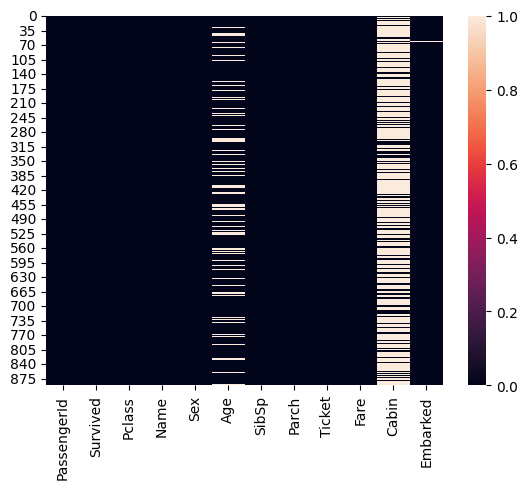

In [14]:
sns.heatmap(data.isnull())         # using heatmap to shows the null value count

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level.So We drop this.Only 2 values are missing in the embarked column we will handle that too.

### FIRST MAKE A COPY OF THE ORIGINAL DATASETS

In [15]:
df = data.copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be more apt about this and check the average age by passenger class and find some relation between age and pclass.

/tmp/ipython-input-2878597699.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')


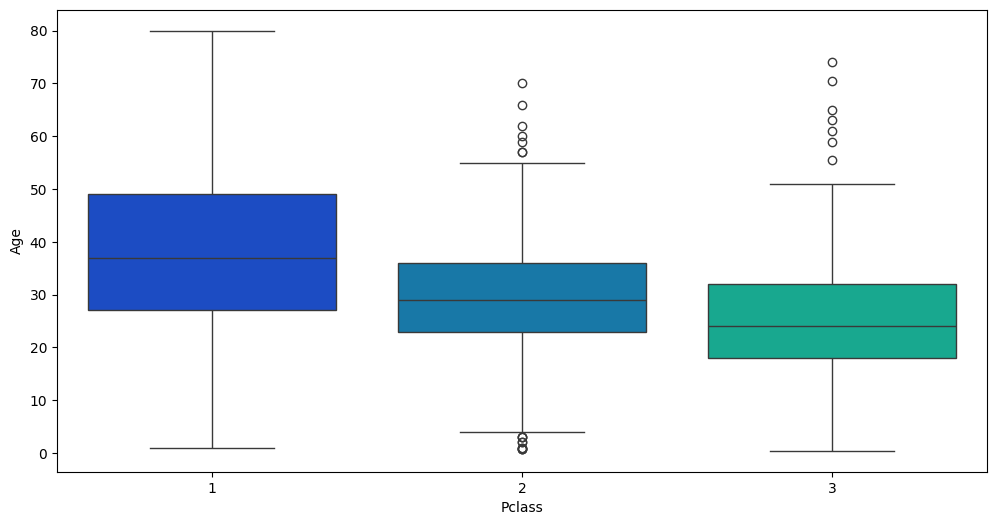

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')
plt.show()

It shows that passanger travelled in 1st class tend to be older than those who travelled in 2nd and 3rd class. Average age are:- 1-37, 2-29, 3-24 now so that it makes sense. We'll use these average age values to impute based on Pclass for Age.

In [17]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [18]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

/tmp/ipython-input-3438464256.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
/tmp/ipython-input-3438464256.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


In [19]:
df.drop('Cabin',axis=1,inplace=True)

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [21]:
df.dropna(inplace=True)

After dropping the Whole Cabin column and missing rows in embarked column.Let's visualize whether the data is clear from missing values or not.

<Axes: >

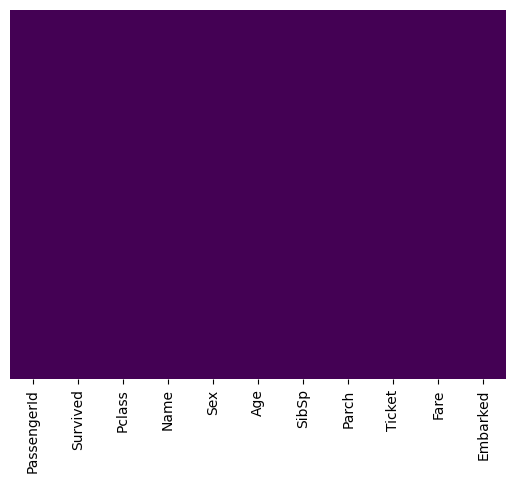

In [22]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [23]:
df.duplicated().sum()       # to shows the count of duplicate rows

np.int64(0)

In [24]:
#check size after cleaning
df.shape

(889, 11)

In [25]:
# save df into csv
df.to_csv('titanic_clean.csv')

### DATA STANDARIZATION

In [26]:
df['Embarked'] = df['Embarked'].map({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})

In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Southampton


In [28]:
df['Survived'] = df['Survived'].map({0: 'No', 1: 'Yes'})
df['Survived'] = df['Survived'].astype(object)

In [29]:
df.dtypes

,0
PassengerId,int64
Survived,object
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


Ticket has numerical as well as string value so the datatype here is object.Hence, No Change

sibsp	is number of siblings / spouses aboard the Titanic
parch	is number of parents / children aboard the Titanic
as the column name length will be too lenghty so we are using the abbreviated version of it.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    object 
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.3+ KB


### Changing data type for the following cols
Survived(category)
PClass(category)
Sex(category)
Age(int)
Embarked(category)

In [31]:
df['Survived']=df['Survived'].astype('category')
df['Pclass']=df['Pclass'].astype('category')
df['Sex']=df['Sex'].astype('category')
df['Age']=df['Age'].astype('int')
df['Embarked']=df['Embarked'].astype('category')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  889 non-null    int64   
 1   Survived     889 non-null    category
 2   Pclass       889 non-null    category
 3   Name         889 non-null    object  
 4   Sex          889 non-null    category
 5   Age          889 non-null    int64   
 6   SibSp        889 non-null    int64   
 7   Parch        889 non-null    int64   
 8   Ticket       889 non-null    object  
 9   Fare         889 non-null    float64 
 10  Embarked     889 non-null    category
dtypes: category(4), float64(1), int64(4), object(2)
memory usage: 59.5+ KB


In [33]:
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,29.003375,0.524184,0.382452,32.096681
std,256.998173,13.217813,1.103705,0.806761,49.697504
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,26.000000,0.000000,0.000000,14.454200
75%,668.000000,36.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


In [34]:
df['SibSp'].value_counts()

,count
SibSp,
0,606
1,209
2,28
4,18
3,16
8,7
5,5


In [35]:
df['Parch'].value_counts()

,count
Parch,
0,676
1,118
2,80
5,5
3,5
4,4
6,1


# Univariate Analysis

/tmp/ipython-input-1685694240.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Survived'], palette='viridis')


Percentage of passengers who did not survive: 62%


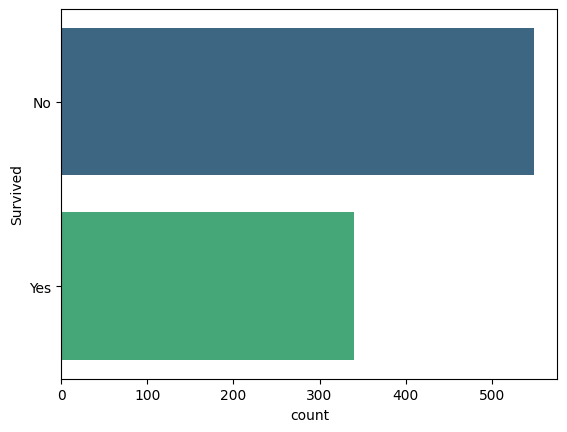

In [36]:
sns.countplot(df['Survived'], palette='viridis')

survived_counts = df['Survived'].value_counts()
total_passengers = len(df)
death_percent = round((survived_counts['No'] / total_passengers) * 100)

print(f"Percentage of passengers who did not survive: {death_percent}%")

INSIGHT:-AROUND 62% PASSANGER DIED.

Pclass
3    55.230596
1    24.071991
2    20.697413
Name: count, dtype: float64


/tmp/ipython-input-3918657897.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Pclass'],palette='viridis')


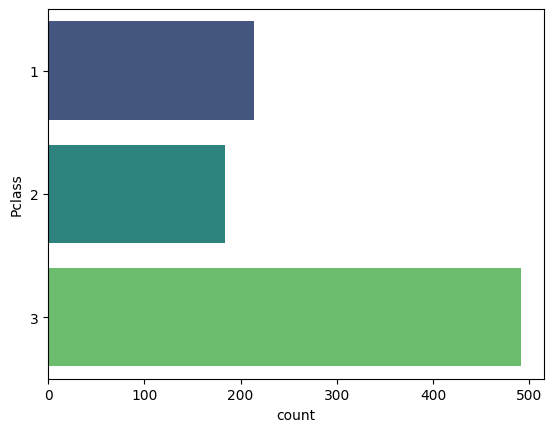

In [37]:
print((df['Pclass'].value_counts()/len(df))*100)

sns.countplot(df['Pclass'],palette='viridis')
plt.show()

INSIGHT:- CLASS 3RD WAS THE MOST POPULATED FOLLOWED BY 1ST AND THEN 2ND

Sex
male      64.904387
female    35.095613
Name: count, dtype: float64


/tmp/ipython-input-3834990750.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Sex'],palette='viridis')


<Axes: xlabel='count', ylabel='Sex'>

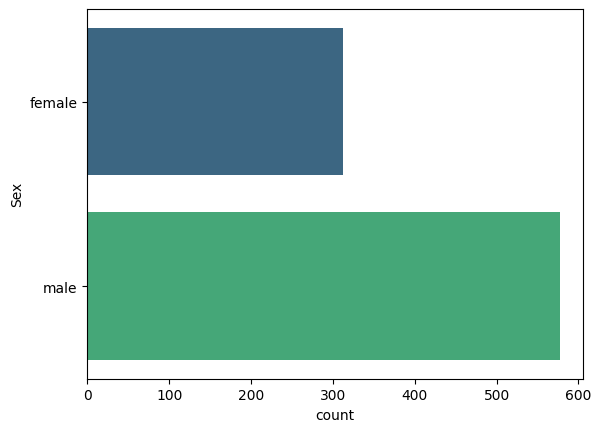

In [38]:
print((df['Sex'].value_counts()/len(df))*100)

sns.countplot(df['Sex'],palette='viridis')

INSIGHTS:- MORE MALES WERE TRAVELLING.

In [39]:
print(df['SibSp'].value_counts())

SibSp
0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


/tmp/ipython-input-3036813832.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='SibSp', palette='viridis')


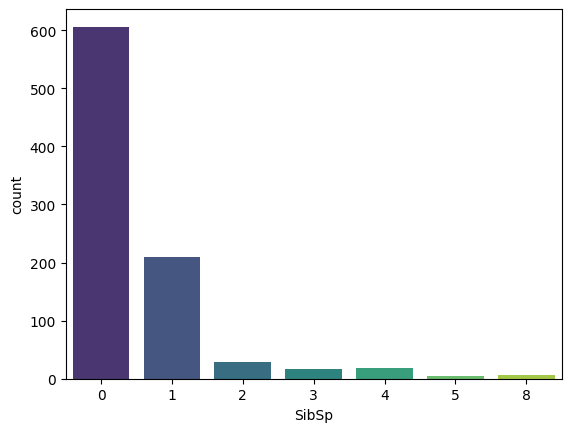

In [40]:
sns.countplot(data=df, x='SibSp', palette='viridis')
plt.show()

INSIGHTS:- MOST OF THEM ARE SOLO TRAVELLLING.

In [41]:
print((df['Parch'].value_counts()/len(df))*100)

Parch
0    76.040495
1    13.273341
2     8.998875
5     0.562430
3     0.562430
4     0.449944
6     0.112486
Name: count, dtype: float64


/tmp/ipython-input-141109697.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Parch', palette='viridis')


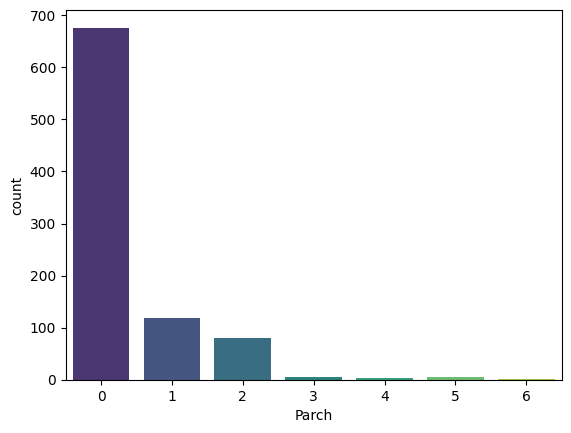

In [42]:
sns.countplot(data=df, x='Parch', palette='viridis')
plt.show()

INSIGHTS:- MOST OF THEM WERE SOLO TRAVELLING

Embarked
Southampton    72.440945
Cherbourg      18.897638
Queenstown      8.661417
Name: count, dtype: float64


/tmp/ipython-input-207043122.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Embarked',palette='viridis')


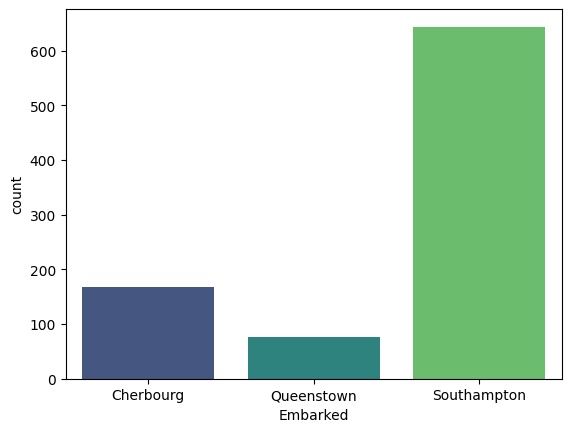

In [43]:
print((df['Embarked'].value_counts()/len(df))*100)

sns.countplot(data=df,x='Embarked',palette='viridis')
plt.show()

INSIGHTS:- MOST OF THEM ARE HEADING TOWARDS SOUTHAMPTON, FOLLOWED BY CHERBOURG AND QUEENSTOWN.

0.5404790076842783
0.7995260731301732


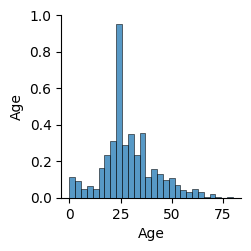

In [44]:
sns.pairplot(df, vars=['Age'])

print(df['Age'].skew())

print(df['Age'].kurt())

INSIGHTS:- THIS GRAPH IS VERY CLOSE NORMALLY DISTRIBUTED WHICH MEANS LESS CHANCE OF HAVING OUTLIER ALSO THE SKEW AND KURT IS ALMOST NORMAL

MOST OF THE PEOPLE WERE IN THE RANGE OF 20 TO 40 WITH THE HIGHEST SPIKE IN 24

<Axes: xlabel='Age'>

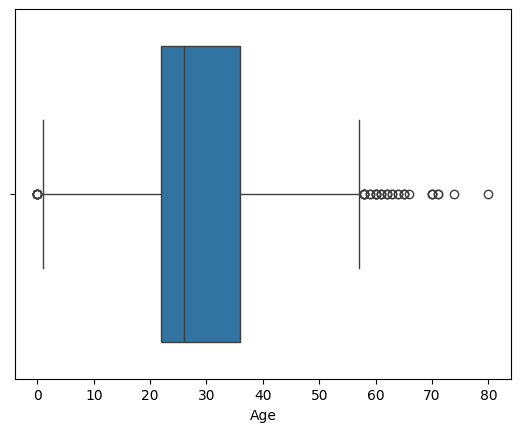

In [45]:
sns.boxplot(data=df,x='Age')

In [46]:
print("People with age in between 60 and 70 are",df[(df['Age']>60) & (df['Age']<70)].shape[0])
print("People with age greater than 70 and 75 are",df[(df['Age']>=70) & (df['Age']<=75)].shape[0])
print("People with age greater than 75 are",df[df['Age']>75].shape[0])
print("People with age between 0 and 1 are",df[df['Age']<1].shape[0])

People with age in between 60 and 70 are 14
People with age greater than 70 and 75 are 6
People with age greater than 75 are 1
People with age between 0 and 1 are 7


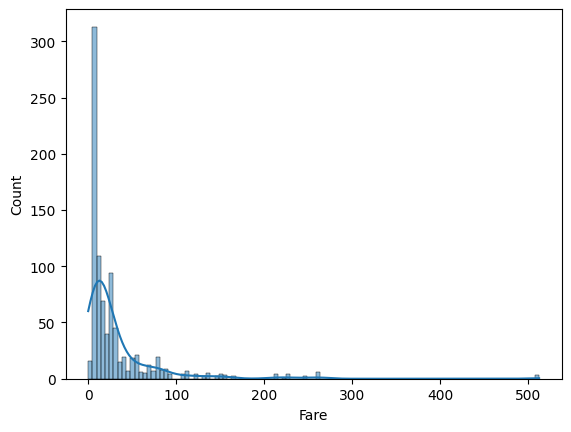

In [47]:
sns.histplot(data=df, x='Fare', kde=True)
plt.show()

In [48]:
print(df['Fare'].skew())
print(df['Fare'].kurt())

4.801440211044194
33.508477269700144


INSIGHT:- FARE IS VERY MUVH RIGHT SKEWED

<Axes: xlabel='Fare'>

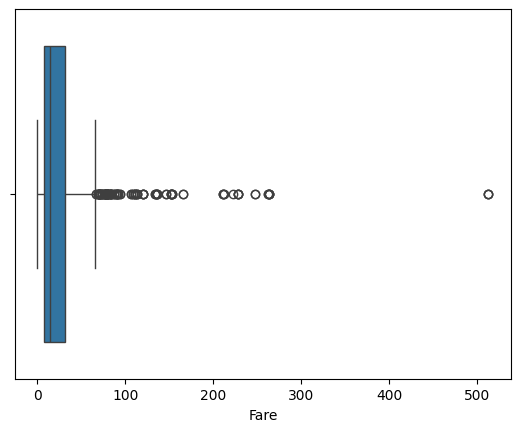

In [49]:
sns.boxplot(data=df,x='Fare')

In [50]:
print("People with fare in between $200 and $300",df[(df['Fare']>200) & (df['Fare']<300)].shape[0])
print("People with fare in greater than $300",df[df['Fare']>300].shape[0])

People with fare in between $200 and $300 17
People with fare in greater than $300 3


INSIGHTS:- MOST PEOPLE BUYED THE CHEAPEST TICKET

# Multivariate Analysis

In [51]:
pclass_survival = df.groupby('Pclass')['Survived'].value_counts().unstack()
display(pclass_survival)

pclass_survival_percentage = df.groupby('Pclass')['Survived'].value_counts(normalize=True).unstack() * 100
display(pclass_survival_percentage)

/tmp/ipython-input-1570429027.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pclass_survival = df.groupby('Pclass')['Survived'].value_counts().unstack()


Survived,No,Yes
Pclass,,
1,80,134
2,97,87
3,372,119


/tmp/ipython-input-1570429027.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pclass_survival_percentage = df.groupby('Pclass')['Survived'].value_counts(normalize=True).unstack() * 100


Survived,No,Yes
Pclass,,
1,37.383178,62.616822
2,52.717391,47.282609
3,75.763747,24.236253


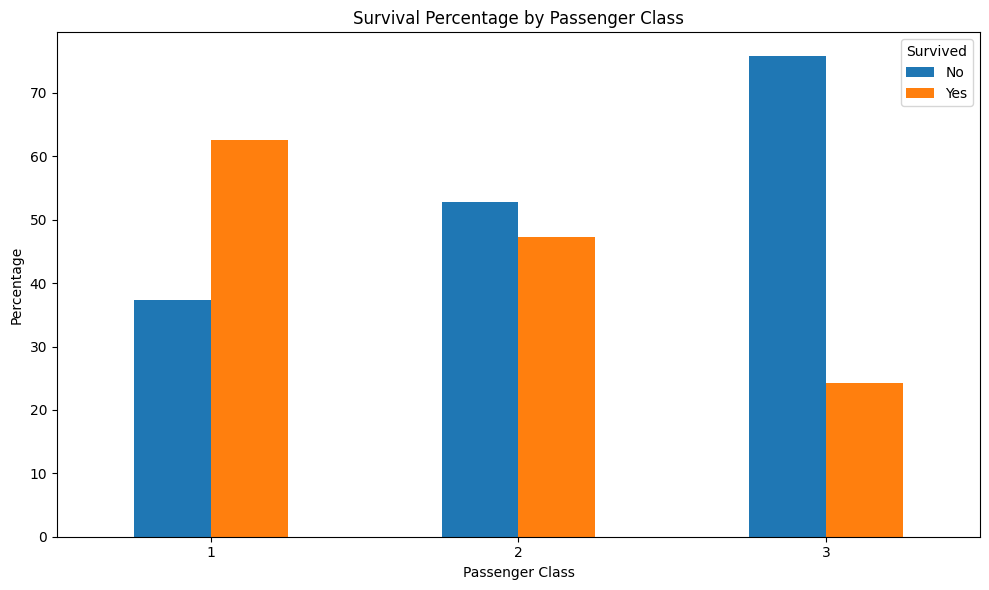

In [52]:
pclass_survival_percentage.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Survival Percentage by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Survived')
plt.tight_layout()
plt.show()

INSIGHTS:- PCLASS 3 WAS THE MOST DEADLIEST IMPACTED CLASS WITH THE MOST MORTALITY RATE WHILE IN THIS DISASTER SAFEST OPTION WAS PCLASS 1

In [53]:
sex_survival = df.groupby('Sex', observed=False)['Survived'].value_counts().unstack()
display(sex_survival)

sex_survival_percentage = df.groupby('Sex', observed=False)['Survived'].value_counts(normalize=True).unstack() * 100
display(sex_survival_percentage)

Survived,No,Yes
Sex,,
female,81,231
male,468,109


Survived,No,Yes
Sex,,
female,25.961538,74.038462
male,81.109185,18.890815


INSIGHTS:- MORE MEN DIED THAN FEMALE IN THIS DISASTER ALMOST 3/4 FEMALE SURVIVED WHILE ONLY 1/5 OF MEN SURVIVED.

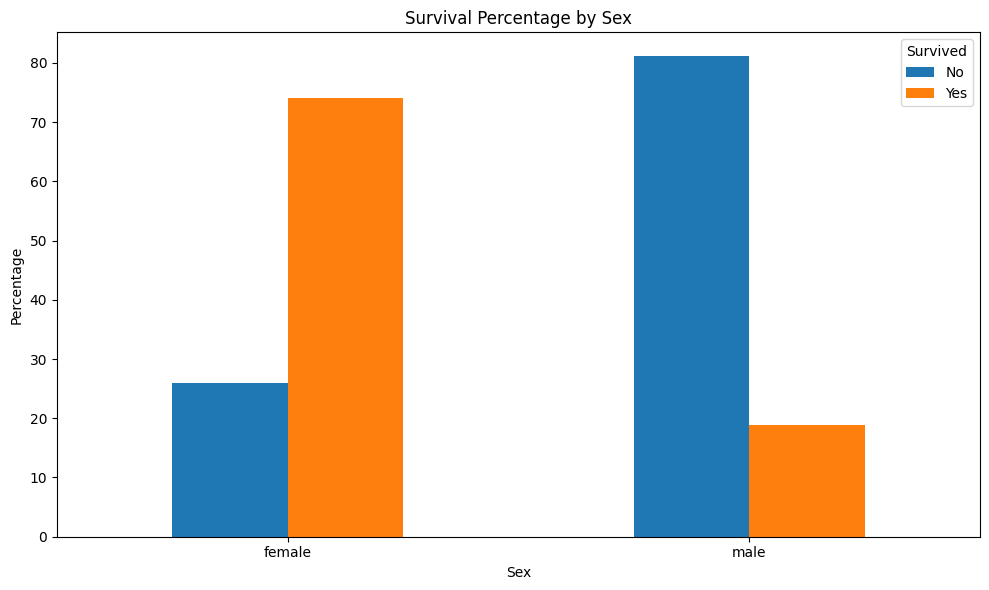

In [54]:
sex_survival_percentage.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Survival Percentage by Sex')
plt.xlabel('Sex')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Survived')
plt.tight_layout()
plt.show()

In [55]:
embarked_survival = df.groupby('Embarked', observed=False)['Survived'].value_counts().unstack()
display(embarked_survival)

embarked_survival_percentage = df.groupby('Embarked', observed=False)['Survived'].value_counts(normalize=True).unstack() * 100
display(embarked_survival_percentage)

Survived,No,Yes
Embarked,,
Cherbourg,75,93
Queenstown,47,30
Southampton,427,217


Survived,No,Yes
Embarked,,
Cherbourg,44.642857,55.357143
Queenstown,61.038961,38.961039
Southampton,66.304348,33.695652


INSIGHTS:- SHOCKING INSIGHT OUT HERE ALMOST MORE THAN HALF OF THE PEOPLE HEADING FOR CHERBOURG SURVIVED THE DISASTER. NEED TO DO FURTHER ANALYSIS ON THIS POINT WHETHER THIS IS BECAUSE THEY ARE MOSTLY FROM 1ST CLASS HIGH PROFILE PEOPLE. NEED TO PLOT A MAP TO UNDERSTAND THE GEOGRAPHIC POINT OF VIEW OR ECONOMIC POINT OF VIEW.

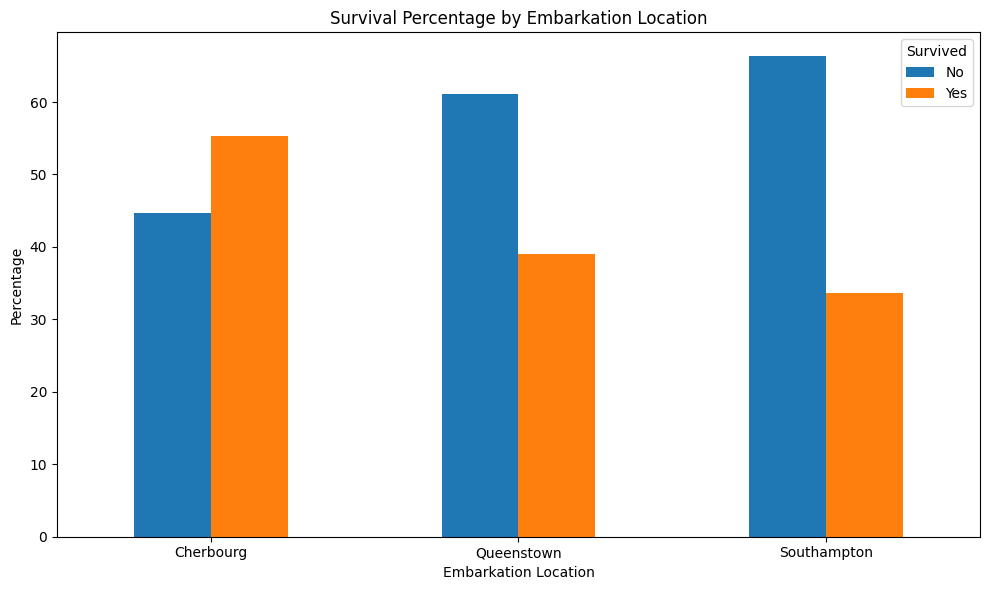

In [56]:
embarked_survival_percentage.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Survival Percentage by Embarkation Location')
plt.xlabel('Embarkation Location')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Survived')
plt.tight_layout()
plt.show()

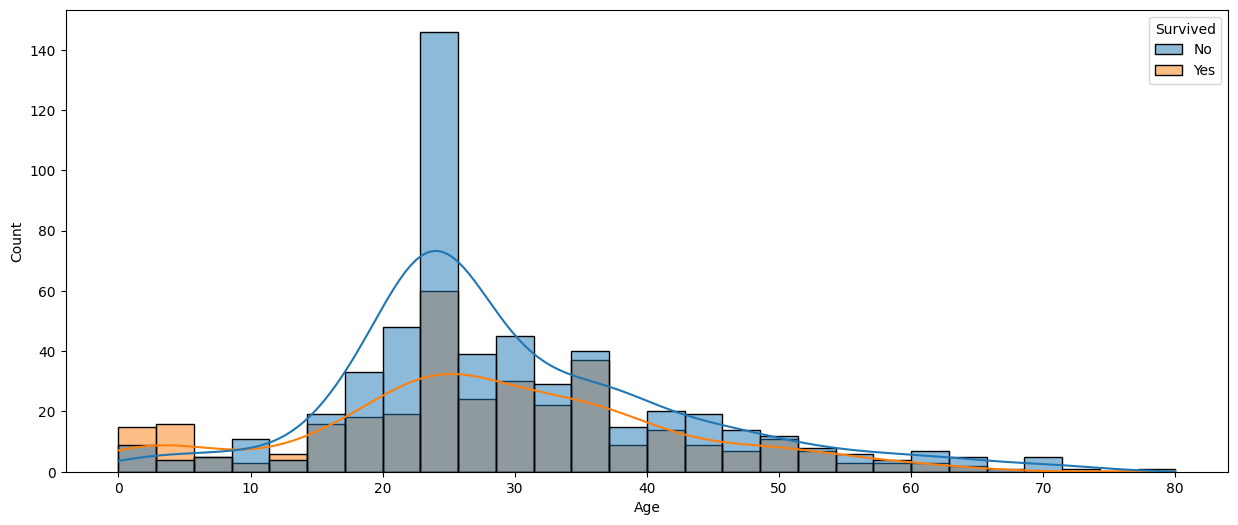

In [57]:
plt.figure(figsize=(15,6))
sns.histplot(data=df, x='Age', hue='Survived', kde=True)
plt.show()

INSIGHTS:- INFANTS AND LOWER AGE GROUP BELOW 15 SURVIVED MORE AS TO SAVE THEIR LIFE WAS THE PRIORITY BUT AFTER 15 TILL 30 THE PROBABILITY OF MORE LIKELY TO HAVE NOT SURVIVED INCREASES,THIS TREND FOLLOWS THE PATH BY AGE OF 33-34 BUT SURPRISINGLY AT 35-36 THE SURVIVING PROBABILITY AGAIN INCREASED TILL 43-44 AGAIN DROPPED BUT AGAIN RISED WHEN THE AGE GROUP IS 50 TO 60 BUT AFTER THAT NO TO NEGLIGIBLE CHANCE FOR SURVIVING.

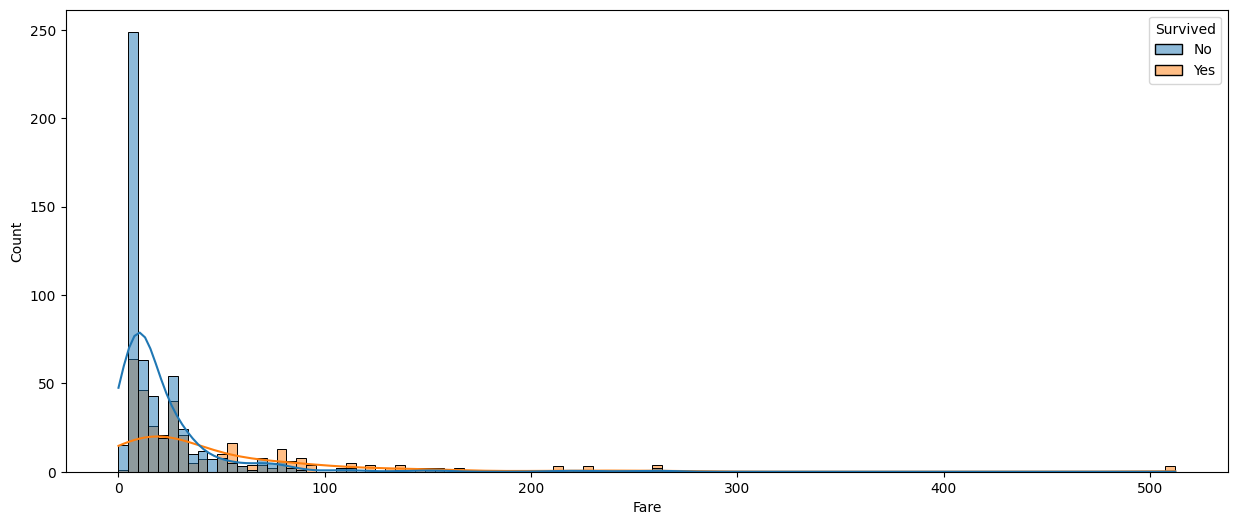

In [58]:
plt.figure(figsize=(15,6))
sns.histplot(data=df, x='Fare', hue='Survived', kde=True)
plt.show()

INSIGHTS:- CLEARLY VISIBLE HIGH CLASS PEOPLE WHO PAID MORE FOR THE TICKET HAVE THE MOST CHANCE OF SURVIVING THAN POPULATION WHO BOUGHT CHEAP TICKETS.

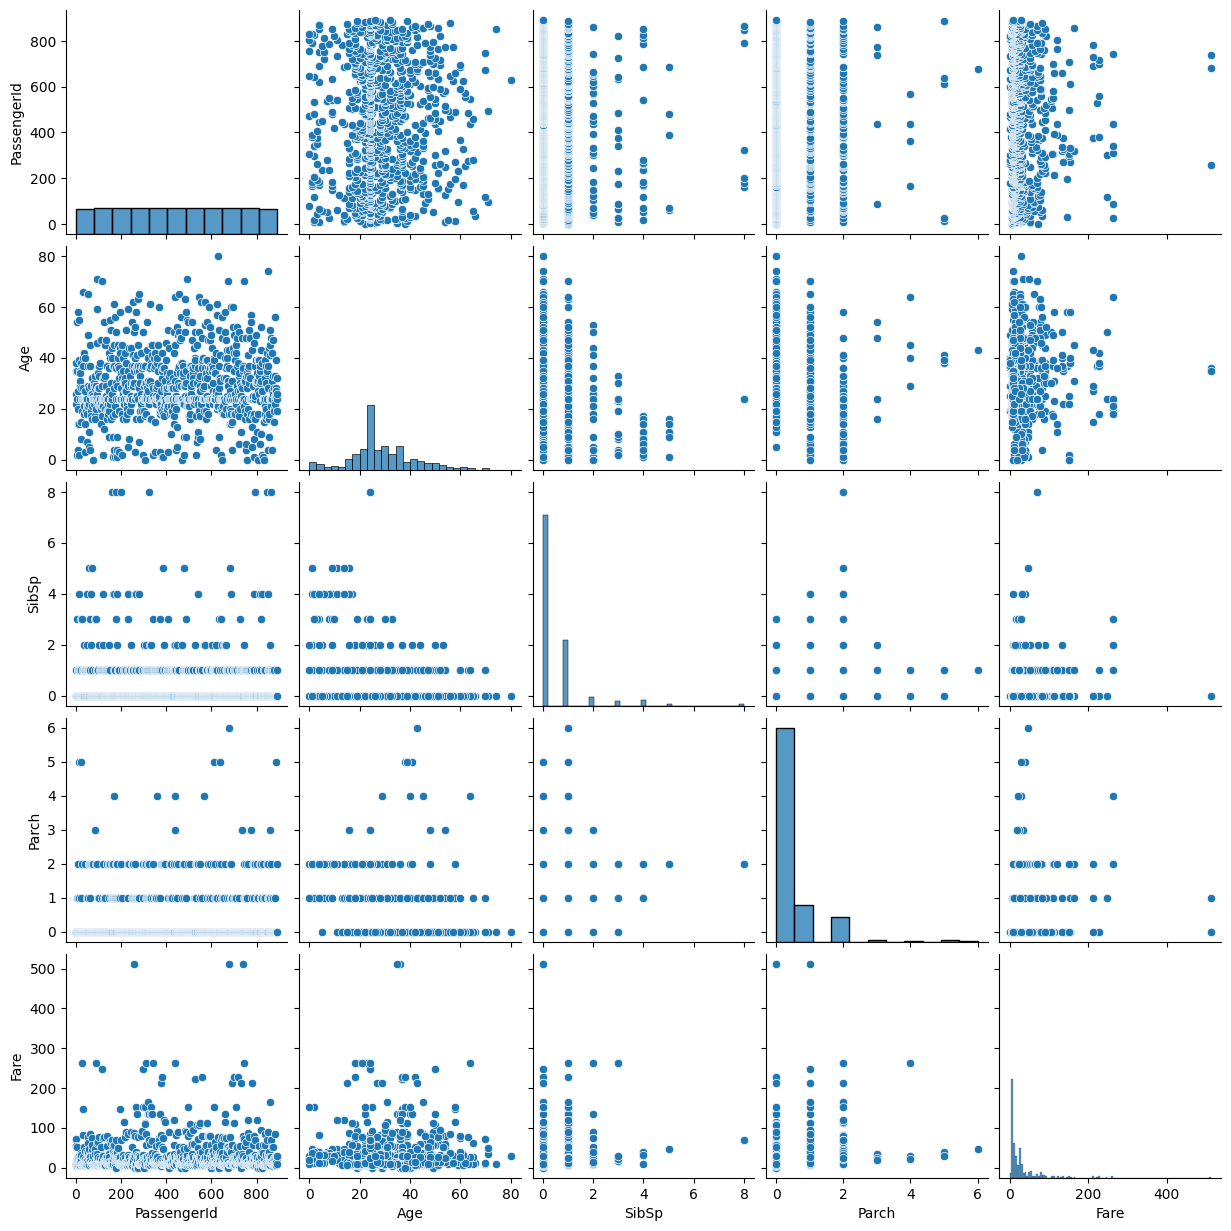

In [59]:
sns.pairplot(df)

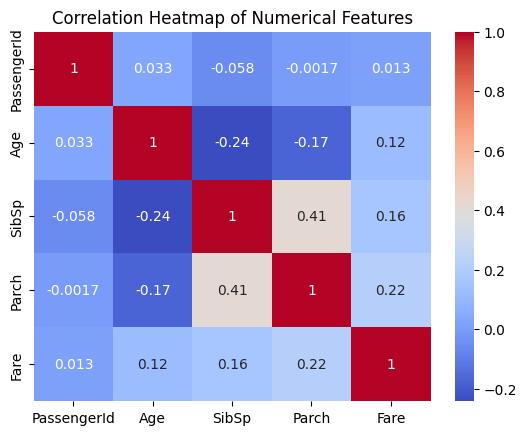

In [60]:
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=[np.number])

sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

INSIGHTS:- SibSp AND Parch HAVE HIGH CORRELATION ALSO Parch AND Fare HAVE HIGH CORRELATION

# Feature Engineering

In [61]:
# creating a new column by the name of family which will be the sum of SibSp and Parch cols

df['family_size']=df['Parch'] + df['SibSp']

In [62]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size
0,1,No,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,Southampton,1


In [63]:
def family_type(number):
    if number==0:
        return "Alone"
    elif number>0 and number<=4:
        return "Medium"
    else:
        return "Large"

In [64]:
df['family_type']=df['family_size'].apply(family_type)

In [65]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,family_type
0,1,No,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,Southampton,1,Medium


In [66]:
# Dropping SibSp, Parch and family_size

df.drop(columns=['SibSp','Parch','family_size'],inplace=True)

In [67]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_type
0,1,No,3,"Braund, Mr. Owen Harris",male,22,A/5 21171,7.25,Southampton,Medium


In [68]:
family_type_survival_percentage = df.groupby('family_type', observed=False)['Survived'].value_counts(normalize=True).unstack() * 100
display(family_type_survival_percentage)

Survived,No,Yes
family_type,,
Alone,69.906542,30.093458
Large,85.106383,14.893617
Medium,43.973941,56.026059


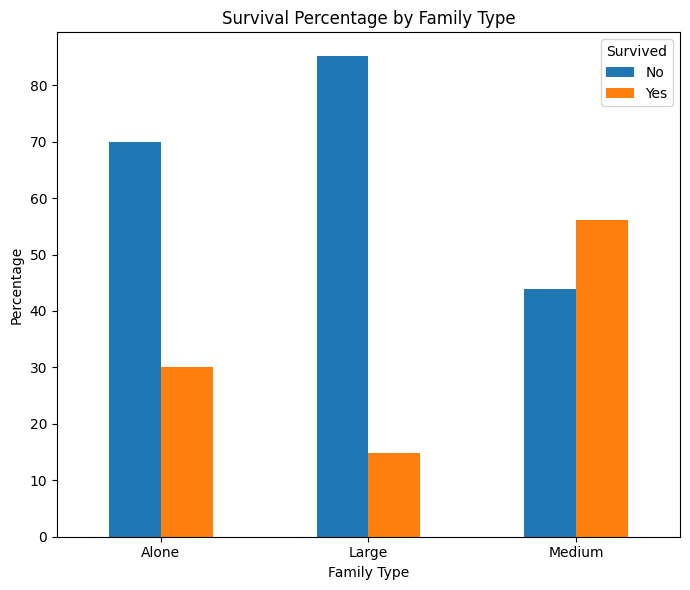

In [69]:
family_type_survival_percentage.plot(kind='bar', stacked=False, figsize=(7, 6))
plt.title('Survival Percentage by Family Type')
plt.xlabel('Family Type')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Survived')
plt.tight_layout()
plt.show()

In [70]:
family_type_survival = df.groupby('family_type', observed=False)['Survived'].value_counts().unstack()
display(family_type_survival)

Survived,No,Yes
family_type,,
Alone,374,161
Large,40,7
Medium,135,172


INSIGHTS:- IF SOMEONE TRAVELLING ALONE THERE IS ALMOST 70% CHANCE OF NOT SURVIVING ALSO IF U HAVE LARGE FAMILY SIZE IT IS LESS LIKELY TO SURVIVE WHEREAS IF THE FAMILY SIZE IS MEDIUM (1 TO 4 MEMBERS) CHANCES OF SURVIVING IS MORE THAN 56%.

# CONCLUSION

The EDA shows a dominant gender effect: women survived at roughly three to four times the rate of men (about 74% vs 19%), making sex the single strongest observed determinant in the dataset. Class was highly stratified, with 1st‑class passengers surviving at about 63%, 2nd‑class near 47%, and 3rd‑class around 24%, reinforcing a consistent socioeconomic gradient. Embarkation patterns aligned with this gradient: Cherbourg passengers survived at about 55% compared with 39% at Queenstown and ~34% at Southampton, and the notebook flags this as a notable insight likely tied to 1st‑class mix and affluence. Family structure mattered: medium families (56% survival) faced best, while those traveling alone (30%) or in large families (15%) faced worst, suggesting benefits from limited social support without the coordination costs of large groups. Age patterns indicate children and early teens had higher survival, rates dipped through young adulthood, rose again in the mid‑30s to early‑40s, showed a smaller lift between 50–60, and fell sharply after 60, consistent with evacuation priorities and vulnerability at older ages. Fare distributions and visuals indicate survivors were concentrated at higher fares, further corroborating the class–wealth survival advantage captured by Pclass, Embarked, and Fare together. Given substantial missing Cabin data (77%) and moderate Age missing (20%), the most reliable, high‑signal features for modeling and interpretation from this EDA are Sex, Pclass, Fare, Age, Embarked, and engineered family size/type, which collectively encapsulate the study’s core patterns of advantage and risk.

# THANK YOU